### 1A

In [13]:
emails <- read.csv("csv/emails.csv", stringsAsFactors = F)
str(emails)

# display sample text
head(emails)
emails$text[1]

# number of total emails in dataset
NROW(emails)

# number of spam emails = 1368
table(emails$spam)

'data.frame':	5728 obs. of  2 variables:
 $ text: chr  "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market"| __truncated__ "Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmar"| __truncated__ "Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved"| __truncated__ "Subject: 4 color printing special  request additional information now ! click here  click here for a printable "| __truncated__ ...
 $ spam: int  1 1 1 1 1 1 1 1 1 1 ...


text,spam
"Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo , stylish statlonery and outstanding website will make the task much easier . we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader : it isguite ciear that without good products , effective business organization and practicable aim it will be hotat nowadays market ; but we do promise that your marketing efforts will become much more effective . here is the list of clear benefits : creativeness : hand - made , original logos , specially done to reflect your distinctive company image . convenience : logo and stationery are provided in all formats ; easy - to - use content management system letsyou change your website content and even its structure . promptness : you will see logo drafts within three business days . affordability : your marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction guaranteed : we provide unlimited amount of changes with no extra fees for you to be surethat you will love the result of this collaboration . have a look at our portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _",1
Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no,1
"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended to you unconditionally and your credit is in no way a factor . to take advantage of this limited time opportunity all we ask is that you visit our website and complete the 1 minute post approval form look foward to hearing from you , dorcas pittman",1
"Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 338 - 8102 e - mail : ramsey @ goldengraphix . com request additional information now ! click here click here for a printable version of our order form ( pdf format ) golden graphix & printing 5110 azusa canyon rd . irwindale , ca 91706 this e - mail message is an advertisement and / or solicitation .",1
"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death . all comedies are ended by marriage .",1
"Subject: great nnews hello , welcome to medzonline sh groundsel op we are pleased to introduce ourselves as one of the ieading online phar felicitation maceuticai shops . helter v shakedown r a cosmopolitan l l blister l l bestow ag ac tosher l is coadjutor va confidant um andmanyother . - sav inexpiable e over 75 % - total confide leisure ntiaiity - worldwide s polite hlpplng - ov allusion er 5 miilion customers in 150 countries have devitalize a nice day !",1


[1] "Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _"

[1] 5728


   0    1 
4360 1368 

### 1B

The word `subject` appears in all emails.

### 1C

No, the word appears in every email so this variable would not help us differentiate spam from ham.

### 1D

In [23]:
# get nchar() for each email
emails$nchar <- nchar(emails$text)

# get email/corresponding index with largest number of characters
max(emails$nchar)
which(emails$nchar == max(emails$nchar))

[1] 43952

[1] 2651

### 1E

In [26]:
# get email/corresponding index with smallest number of characters
min(emails$nchar)
which(emails$nchar == min(emails$nchar))

[1] 13

[1] 1992

### 1F

In [56]:
library(tm)

# preprocessing to get around Linux string formatting bug
# apply proper encoding for columns with datatype `string`
# emails[,sapply(emails,is.character)] <- sapply(
#     emails[,sapply(emails,is.character)],
#     iconv,"WINDOWS-1252","UTF-8")


corpus <- Corpus(VectorSource(emails$text))
# corpus
# corpus[[1]]
# as.character(corpus[[1]])

# preprocessing
corpus <- tm_map(corpus, tolower)
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, stopwords("english"))
corpus <- tm_map(corpus, removeWords, c("subject"))
corpus <- tm_map(corpus, stemDocument)

# building document-term matrix
dtm <- DocumentTermMatrix(corpus)
dtm

<<DocumentTermMatrix (documents: 5728, terms: 28687)>>
Non-/sparse entries: 476011/163843125
Sparsity           : 100%
Maximal term length: 24
Weighting          : term frequency (tf)

### 1G

In [90]:
spdtm <- removeSparseTerms(dtm, 0.95)
spdtm

<<DocumentTermMatrix (documents: 5728, terms: 329)>>
Non-/sparse entries: 207823/1676689
Sparsity           : 89%
Maximal term length: 10
Weighting          : term frequency (tf)

### 1H

In [58]:
emailsSparse <- as.data.frame(as.matrix(spdtm))
colnames(emailsSparse) <- make.names(colnames(emailsSparse))
head(emailsSparse)

sort(colSums(emailsSparse), decreasing = T)
# `enron` appears most often

busi,chang,compani,corpor,day,done,effect,effort,even,full,⋯,vinc,X853,shirley,enron,kaminski,X713,crenshaw,vkamin,gibner,stinson
2,2,3,1,1,1,2,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


enron        ect       vinc       will        hou        com      pleas 
     13388      11427       8532       8252       5577       5443       5113 
     X2000   kaminski        can      thank    forward       time      X2001 
      4967       4801       4257       3730       3161       3145       3089 
  research     market       work     inform      price       meet       know 
      2820       2750       2708       2701       2694       2623       2614 
     group      manag        may        get       like        use       need 
      2604       2600       2465       2462       2352       2330       2328 
      busi    compani        new       mail       risk      model     energi 
      2313       2290       2281       2269       2267       2199       2179 
     power        one      email     regard       look     messag        let 
      2117       2108       2066       2045       2003       1983       1963 
      year       make    develop       also        day   interest       week 
      1890       1884       1882       1864       1860       1814       1758 
      corp    shirley       call        edu       http    houston        see 
      1692       1689       1687       1627       1609       1582       1567 
    receiv     follow    present    contact    project       want     option 
      1557       1552       1543       1543       1522       1488       1488 
   program       help       list     provid       send      trade       take 
      1438       1430       1410       1405       1379       1366       1361 
      just    request   communic     servic  interview    discuss        www 
      1354       1344       1343       1337       1333       1326       1323 
       now     confer       best     report     includ      think      order 
      1300       1297       1291       1279       1238       1216       1210 
   product       date     number     attach      offer    address      avail 
      1197       1187       1182       1176       1171       1154       1152 
  question      next.       free      visit       sent       well     system 
      1152       1145       1141       1126       1126       1125       1118 
  crenshaw      posit       good       X713       name      state     financ 
      1115       1104       1097       1097       1089       1086       1073 
   schedul        gas      offic    univers       give    stinson    current 
      1071       1070       1068       1059       1055       1051       1044 
      john        fax      chang       X000      phone       last       talk 
      1042       1038       1035       1007       1001        998        981 
    review    process   industri     credit      month      peopl       data 
       976        975        970        960        958        958        955 
      issu      resum      first       team   opportun       site        two 
       944        933        929        926        918        913        911 
   financi       plan       come     origin      shall      start        ask 
       909        904        903        892        884        880        871 
    invest       find        way       back       much       hope      secur 
       867        867        864        864        861        858        857 
   support     friday     london       dear      great       base    account 
       854        854        843        838        837        837        829 
     today    respons       cost       oper       copi     custom    possibl 
       828        824        821        820        797        796        796 
    access       term   particip     associ      money      addit       file 
       789        786        782        777        776        774        770 
     click     person       mani       book    softwar     requir     within 
       769        767        758        756        739        736        732 
       set    student      futur       valu       rate    complet   director 
       727        726      

### 1I

In [92]:
emailsSparse$spam <- emails$spam
hamSparse <- subset(emailsSparse, emailsSparse$spam == 0)

# only 5 words appear in the ham emails at least 5000 times
sort(colSums(hamSparse), decreasing = T)[sort(colSums(hamSparse), decreasing = T) >= 5000]

enron   ect  vinc  will   hou 
13388 11417  8531  6802  5569

### 1J

In [60]:
spamSparse <- subset(emailsSparse, emailsSparse$spam == 1)

# only 3 words appear in the spam emails at least 1000 times
sort(colSums(spamSparse), decreasing = T)[sort(colSums(spamSparse), decreasing = T) >= 1000]

will    spam compani 
   1450    1368    1065

### 1K

The frequencies of these most common words are likely to help differentiate between spam and ham.

### 1L

The models we build are personalized, and would need to be further tested before being used as a spam filter for another person.

### 1M

*WARNING*: long computation time

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


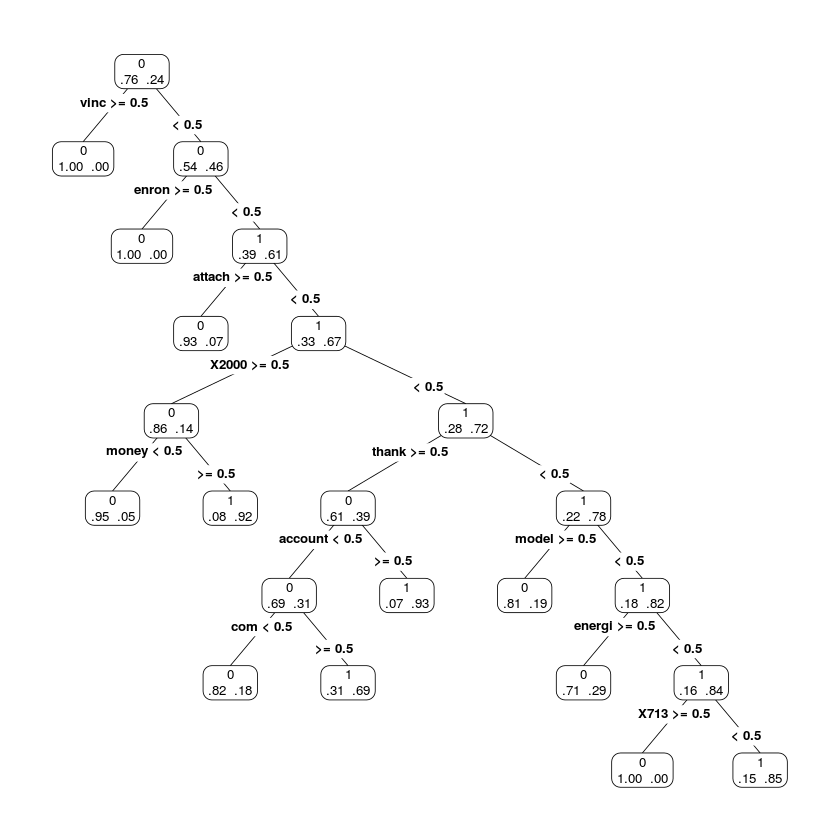

In [70]:
emailsSparse$spam <- as.factor(emailsSparse$spam)

# splitting into training and test sets (rmb to always split on dependent var)
library(caTools)
set.seed(123)
spl <- sample.split(emailsSparse$spam, SplitRatio = 0.7)
train1 <- subset(emailsSparse, spl == T)
test1 <- subset(emailsSparse, spl == F)

# Model_1: log regression
spamLog <- glm(spam~., train1, family="binomial")

# Model_2: CART
library(rpart)
library(rpart.plot)
set.seed(123)
spamCART <- rpart(spam~., train1)

# Model_3: ranfom forest
library(randomForest)
set.seed(123)
spamRF <- randomForest(spam~., train1)

In [134]:
spamLogPredict <- predict(spamLog, train1, type="response")
spamCARTPredict <- predict(spamCART, train1, type='prob')
spamRFPredict <- predict(spamRF, train1, type='prob')

# spamLog probability counting
length(spamLogPredict[spamLogPredict < 0.00001])
length(spamLogPredict[spamLogPredict > 0.99999])
length(spamLogPredict[spamLogPredict > 0.00001 & spamLogPredict < 0.99999])

[1] 3046

[1] 954

[1] 10

### 1N

There are no variables labelled as significant ($p=0.5$)

In [88]:
summary(spamLog)


Call:
glm(formula = spam ~ ., family = "binomial", data = train1)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.011   0.000   0.000   0.000   1.354  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -4.055e-01  6.455e-01  -0.628    0.530
busi        -3.601e+00  1.378e+04   0.000    1.000
chang       -2.711e+01  1.857e+04  -0.001    0.999
compani      4.426e+00  1.109e+04   0.000    1.000
corpor       1.033e-01  2.871e+04   0.000    1.000
day         -5.244e+00  8.973e+03  -0.001    1.000
done         9.355e+00  5.901e+04   0.000    1.000
effect       2.255e+01  3.844e+04   0.001    1.000
effort       1.396e+01  6.308e+04   0.000    1.000
even        -1.875e+01  4.433e+04   0.000    1.000
full         5.810e+00  2.568e+04   0.000    1.000
good         1.051e+01  1.684e+04   0.001    1.000
inform       1.747e+01  1.038e+04   0.002    0.999
interest     2.489e+01  1.563e+04   0.002    0.999
list        -8.088e+00  1.198e+03  -0.007    0.99

### 1O

- `enron`: 1
- `hou`:  0
- `vinc`: 1
- `kaminski`: 0 

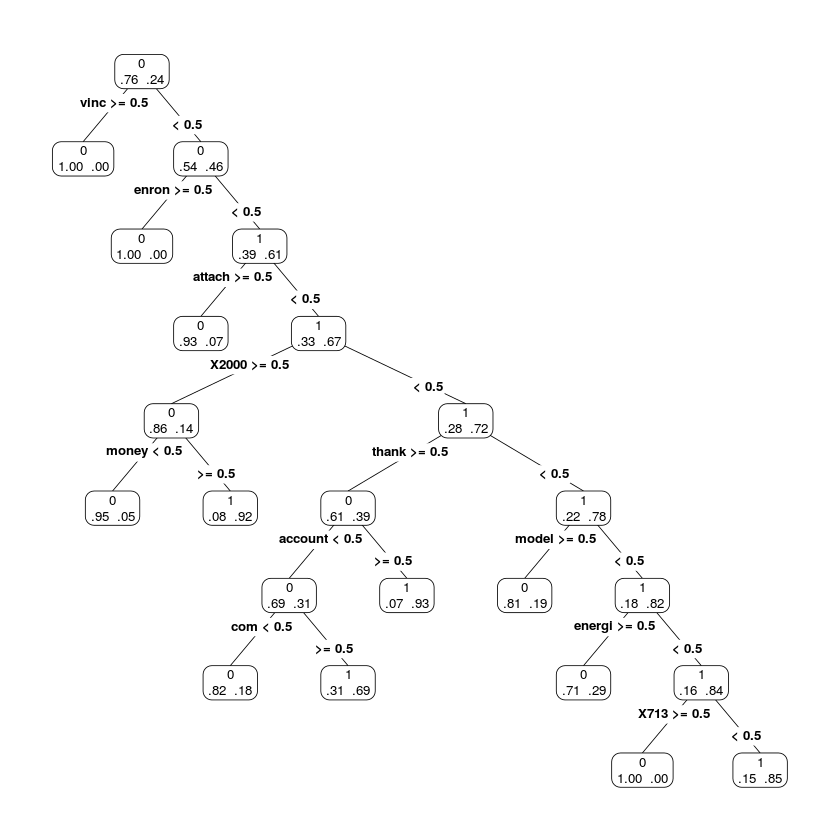

In [100]:
prp(spamCART, extra=4, type=4, branch=0)

### 1P

In [114]:
library(ROCR)

threshold = 0.5
table(spamLogPredict>=threshold, train1$spam)

LogROCR <- prediction(spamLogPredict, train1$spam)
LogAUC <- performance(LogROCR, measure="auc")

# accuracy / AUC
(3052+954)/(3052+954+4)
LogAUC@y.values

       
           0    1
  FALSE 3052    4
  TRUE     0  954

[1] 0.9990025

[[1]]
[1] 0.9999959

### 1Q & 1R

In [128]:
threshold = 0.5
table(spamCARTPredict[,"1"]>=threshold, train1$spam)

cartROCR <- prediction(spamCARTPredict[,"1"], train1$spam)
cartAUC <- performance(cartROCR, measure="auc")

# accuracy / AUC
(2885+894)/(2885+894+167+64)
cartAUC@y.values

       
           0    1
  FALSE 2885   64
  TRUE   167  894

[1] 0.942394

[[1]]
[1] 0.9696044

### 1S & 1T

In [137]:
threshold = 0.5
table(spamRFPredict[,"1"]>=threshold, train1$spam)

rfROCR <- prediction(spamRFPredict[,"1"], train1$spam)
rfAUC <- performance(rfROCR, measure="auc")

# accuracy / AUC
(3046+958)/(3046+958+6)
rfAUC@y.values

       
           0    1
  FALSE 3046    0
  TRUE     6  958

[1] 0.9985037

[[1]]
[1] 0.9999959

### 1U

Logistic regression has the best training set performance, in terms of accuracy and AUC.

### 1V

In [142]:
spamLogPredictTest <- predict(spamLog, test1, type="response")
spamCARTPredictTest <- predict(spamCART, test1, type='prob')
spamRFPredictTest <- predict(spamRF, test1, type='prob')

# accuracy table
threshold = 0.5
table(spamLogPredictTest>=threshold, test1$spam)

# AUC performance
LogROCRtest <- prediction(spamLogPredictTest, test1$spam)
LogAUCtest <- performance(LogROCRtest, measure="auc")

# calculating accuracy / AUC
(1258+374)/(1258+374+50+36)
LogAUCtest@y.values

       
           0    1
  FALSE 1258   36
  TRUE    50  374

[1] 0.9499418

[[1]]
[1] 0.9630268

### 1W

In [145]:
# CART: accuracy table
threshold = 0.5
table(spamCARTPredictTest[,"1"]>=threshold, test1$spam)

# CART: AUC performance
cartROCRtest <- prediction(spamCARTPredictTest[,"1"], test1$spam)
cartAUCtest <- performance(cartROCRtest, measure="auc")

# CART: calculating accuracy / AUC
(1228+386)/(1228+386+80+24)
cartAUCtest@y.values

# RF: accuracy table
threshold = 0.5
table(spamRFPredictTest[,"1"]>=threshold, test1$spam)

# RF: AUC performance
rfROCRtest <- prediction(spamRFPredictTest[,"1"], test1$spam)
rfAUCtest <- performance(rfROCRtest, measure="auc")

# RF: calculating accuracy / AUC
(1280+387)/(1280+387+18+23)
rfAUCtest@y.values

       
           0    1
  FALSE 1228   24
  TRUE    80  386

[1] 0.9394645

[[1]]
[1] 0.963176

       
           0    1
  FALSE 1290   23
  TRUE    18  387

[1] 0.9759953

[[1]]
[1] 0.9974892

### 1X

Random forest has the best training set performance, in terms of accuracy and AUC.

### 1Y

Logistic regression models demonstrated the greatest degree of overfitting.

### 2A

In [148]:
stocks <- read.csv("csv/StocksCluster.csv")
str(stocks) # 11580 total observations

'data.frame':	11580 obs. of  12 variables:
 $ ReturnJan  : num  0.0807 -0.0107 0.0477 -0.074 -0.031 ...
 $ ReturnFeb  : num  0.0663 0.1021 0.036 -0.0482 -0.2127 ...
 $ ReturnMar  : num  0.0329 0.1455 0.0397 0.0182 0.0915 ...
 $ ReturnApr  : num  0.1831 -0.0844 -0.1624 -0.0247 0.1893 ...
 $ ReturnMay  : num  0.13033 -0.3273 -0.14743 -0.00604 -0.15385 ...
 $ ReturnJune : num  -0.0176 -0.3593 0.0486 -0.0253 -0.1061 ...
 $ ReturnJuly : num  -0.0205 -0.0253 -0.1354 -0.094 0.3553 ...
 $ ReturnAug  : num  0.0247 0.2113 0.0334 0.0953 0.0568 ...
 $ ReturnSep  : num  -0.0204 -0.58 0 0.0567 0.0336 ...
 $ ReturnOct  : num  -0.1733 -0.2671 0.0917 -0.0963 0.0363 ...
 $ ReturnNov  : num  -0.0254 -0.1512 -0.0596 -0.0405 -0.0853 ...
 $ PositiveDec: int  0 0 0 1 1 1 1 0 0 0 ...


### 2B

In [151]:
length(stocks$PositiveDec[stocks$PositiveDec == 1])/11580

[1] 0.546114

### 2C

In [164]:
cor(stocks)
sort(abs(cor(stocks)), decreasing = T)[1:20]

# Max correlation is between `ReturnOct` and `ReturnNov` = 0.19167279

,ReturnJan,ReturnFeb,ReturnMar,ReturnApr,ReturnMay,ReturnJune,ReturnJuly,ReturnAug,ReturnSep,ReturnOct,ReturnNov,PositiveDec
ReturnJan,1.000000000,0.06677458,-0.090496798,-0.037678006,-0.044411417,0.09223831,-0.0814297650,-0.0227920187,-0.0264371526,0.14297723,0.06763233,0.004728518
ReturnFeb,0.066774583,1.00000000,-0.155983263,-0.191351924,-0.095520920,0.16999448,-0.0617785094,0.1315597863,0.0435017706,-0.08732427,-0.15465828,-0.038173184
ReturnMar,-0.090496798,-0.15598326,1.000000000,0.009726288,-0.003892789,-0.08590549,0.0033741597,-0.0220053995,0.0765183267,-0.01192376,0.03732353,0.022408661
ReturnApr,-0.037678006,-0.19135192,0.009726288,1.000000000,0.063822504,-0.01102775,0.0806319317,-0.0517560510,-0.0289209718,0.04854003,0.03176184,0.094353528
ReturnMay,-0.044411417,-0.09552092,-0.003892789,0.063822504,1.000000000,-0.02107454,0.0908502642,-0.0331256580,0.0219628623,0.01716673,0.04804659,0.058201934
ReturnJune,0.092238307,0.16999448,-0.085905486,-0.011027752,-0.021074539,1.00000000,-0.0291525996,0.0107105260,0.0447472692,-0.02263599,-0.06527054,0.023409745
ReturnJuly,-0.081429765,-0.06177851,0.003374160,0.080631932,0.090850264,-0.02915260,1.0000000000,0.0007137558,0.0689478037,-0.05470891,-0.04837384,0.074364210
ReturnAug,-0.022792019,0.13155979,-0.022005400,-0.051756051,-0.033125658,0.01071053,0.0007137558,1.0000000000,0.0007407139,-0.07559456,-0.11648903,0.004166966
ReturnSep,-0.026437153,0.04350177,0.076518327,-0.028920972,0.021962862,0.04474727,0.0689478037,0.0007407139,1.0000000000,-0.05807924,-0.01971980,0.041630286
ReturnOct,0.142977229,-0.08732427,-0.011923758,0.048540025,0.017166728,-0.02263599,-0.0547089088,-0.0755945614,-0.0580792362,1.00000000,0.19167279,-0.052574956


[1] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000
 [8] 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 0.1916728 0.1916728
[15] 0.1913519 0.1913519 0.1699945 0.1699945 0.1559833 0.1559833

### 2D

Month with largest mean return is **April**. Month with smallest mean return is **September**.

In [169]:
sort(colSums(stocks)/NROW(stocks))

ReturnSep    ReturnFeb   ReturnJuly    ReturnOct   ReturnJune    ReturnNov 
-0.014720768 -0.007604784  0.003050863  0.005650844  0.005937902  0.011387440 
   ReturnJan    ReturnAug    ReturnMar    ReturnMay    ReturnApr  PositiveDec 
 0.012631602  0.016198265  0.019402336  0.024736591  0.026308147  0.546113990

### 2E

In [176]:
set.seed(144)
spl <- sample.split(stocks$PositiveDec, SplitRatio = 0.7)
stocksTrain <- subset(stocks, spl == T)
stocksTest <- subset(stocks, spl == F)

StocksGLM <- glm(PositiveDec~., stocksTrain, family="binomial")
predictGLM <- predict(StocksGLM, stocksTrain, type="response")

table(predictGLM>=0.5, stocksTrain$PositiveDec)

# log-regression: training accuracy
(990+3640)/(990+3640+2689+787)

       
           0    1
  FALSE  990  787
  TRUE  2689 3640

[1] 0.5711818

### 2F

In [179]:
predictGLMtest <- predict(StocksGLM, stocksTest, type="response")

table(predictGLMtest>=0.5, stocksTest$PositiveDec)

# log-regression: test accuracy
(417+1553)/(417+1553+1160+344)

       
           0    1
  FALSE  417  344
  TRUE  1160 1553

[1] 0.5670697

### 2G

In [187]:
table(stocksTrain$PositiveDec) # most common response is to predict `1`

table(predictGLMtest>=0, stocksTest$PositiveDec)

# Baseline: test accuracy
(1897)/(1577+1897)


   0    1 
3679 4427 

      
          0    1
  TRUE 1577 1897

[1] 0.5460564

### 2H

Needing to know the dependent variable value to assign an observation to a cluster defeats the purpose of the methodology

In [188]:
limitedTrain <- stocksTrain
limitedTrain$PositiveDec <- NULL

limitedTest <- stocksTest
limitedTest$PositiveDec <- NULL

### 2I

In [200]:
library(caret)
preproc <- preProcess(limitedTrain)
normTrain <- predict(preproc, limitedTrain)
normTest <- predict(preproc, limitedTest)

# mean of normalised `ReturnJan` variable
(colSums(normTrain)/NROW(normTrain))["ReturnJan"]
(colSums(normTest)/NROW(normTest))["ReturnJan"]

ReturnJan 
1.330682e-17

ReturnJan 
-0.0004185886

### 2J

The distribution of the ReturnJan variable is different in the training and testing set.

### 2K

**Cluster 2** has the largest number of observations.

In [210]:
set.seed(144)
km <- kmeans(normTrain, centers=3)
km$size

[1] 3157 4696  253

### 2L

2080 observations were assigned to be within *Cluster 2*.

In [221]:
library(flexclust)
km.kcca <- as.kcca(km, normTrain)
clusterTrain <- predict(km.kcca)
clusterTest <- predict(km.kcca, newdata=normTest)

table(clusterTrain)
table(clusterTest)

clusterTrain
   1    2    3 
3157 4696  253 

clusterTest
   1    2    3 
1298 2080   96 

### 2M

`stocksTrains1` dataframe has the highest average value of the dependent variable.

In [231]:
stocksTrain1 <- subset(stocksTrain, clusterTrain == 1)
stocksTrain2 <- subset(stocksTrain, clusterTrain == 2)
stocksTrain3 <- subset(stocksTrain, clusterTrain == 3)

stocksTest1 <- subset(stocksTest, clusterTrain == 1)
stocksTest2 <- subset(stocksTest, clusterTrain == 2)
stocksTest3 <- subset(stocksTest, clusterTrain == 3)

sum(stocksTrain1$PositiveDec)/NROW(stocksTrain1)
sum(stocksTrain2$PositiveDec)/NROW(stocksTrain2)
sum(stocksTrain3$PositiveDec)/NROW(stocksTrain3)

[1] 0.6024707

[1] 0.5140545

[1] 0.4387352

### 2N

All variables except `ReturnNov` have a positive coefficient in at least one of *StocksModel1*, *StocksModel2*, *StocksModel3*. All variables except `ReturnApr`, `ReturnMay`, `ReturnJuly`, `ReturnSep` have a negative coefficient in at least one of *StocksModel1*, *StocksModel2*, *StocksModel3*.

In [230]:
StocksModel1 <- glm(PositiveDec~., stocksTrain1, family="binomial")
StocksModel2 <- glm(PositiveDec~., stocksTrain2, family="binomial")
StocksModel3 <- glm(PositiveDec~., stocksTrain3, family="binomial")

summary(StocksModel1)
summary(StocksModel2)
summary(StocksModel3)


Call:
glm(formula = PositiveDec ~ ., family = "binomial", data = stocksTrain1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7307  -1.2910   0.8878   1.0280   1.5023  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.17224    0.06302   2.733  0.00628 ** 
ReturnJan    0.02498    0.29306   0.085  0.93206    
ReturnFeb   -0.37207    0.29123  -1.278  0.20139    
ReturnMar    0.59555    0.23325   2.553  0.01067 *  
ReturnApr    1.19048    0.22439   5.305 1.12e-07 ***
ReturnMay    0.30421    0.22845   1.332  0.18298    
ReturnJune  -0.01165    0.29993  -0.039  0.96901    
ReturnJuly   0.19769    0.27790   0.711  0.47685    
ReturnAug    0.51273    0.30858   1.662  0.09660 .  
ReturnSep    0.58833    0.28133   2.091  0.03651 *  
ReturnOct   -1.02254    0.26007  -3.932 8.43e-05 ***
ReturnNov   -0.74847    0.28280  -2.647  0.00813 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial


Call:
glm(formula = PositiveDec ~ ., family = "binomial", data = stocksTrain2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2012  -1.1941   0.8583   1.1334   1.9424  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.10293    0.03785   2.719 0.006540 ** 
ReturnJan    0.88451    0.20276   4.362 1.29e-05 ***
ReturnFeb    0.31762    0.26624   1.193 0.232878    
ReturnMar   -0.37978    0.24045  -1.579 0.114231    
ReturnApr    0.49291    0.22460   2.195 0.028189 *  
ReturnMay    0.89655    0.25492   3.517 0.000436 ***
ReturnJune   1.50088    0.26014   5.770 7.95e-09 ***
ReturnJuly   0.78315    0.26864   2.915 0.003554 ** 
ReturnAug   -0.24486    0.27080  -0.904 0.365876    
ReturnSep    0.73685    0.24820   2.969 0.002989 ** 
ReturnOct   -0.27756    0.18400  -1.509 0.131419    
ReturnNov   -0.78747    0.22458  -3.506 0.000454 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial


Call:
glm(formula = PositiveDec ~ ., family = "binomial", data = stocksTrain3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9146  -1.0393  -0.7689   1.1921   1.6939  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.181896   0.325182  -0.559   0.5759  
ReturnJan   -0.009789   0.448943  -0.022   0.9826  
ReturnFeb   -0.046883   0.213432  -0.220   0.8261  
ReturnMar    0.674179   0.564790   1.194   0.2326  
ReturnApr    1.281466   0.602672   2.126   0.0335 *
ReturnMay    0.762512   0.647783   1.177   0.2392  
ReturnJune   0.329434   0.408038   0.807   0.4195  
ReturnJuly   0.774164   0.729360   1.061   0.2885  
ReturnAug    0.982605   0.533158   1.843   0.0653 .
ReturnSep    0.363807   0.627774   0.580   0.5622  
ReturnOct    0.782242   0.733123   1.067   0.2860  
ReturnNov   -0.873752   0.738480  -1.183   0.2367  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken

### 2O

In [239]:
PredictTest1 <- predict(StocksModel1, stocksTest1, type="response")
PredictTest2 <- predict(StocksModel2, stocksTest2, type="response")
PredictTest3 <- predict(StocksModel3, stocksTest3, type="response")

# stocksModel1 - accuracy
table(PredictTest1>=0.5, stocksTest1$PositiveDec)
(101+498)/(101+498+341+103)

# stocksModel2 - accuracy
table(PredictTest2>=0.5, stocksTest2$PositiveDec)
(361+862)/(361+862+686+301)

# stocksModel3 - accuracy
table(PredictTest3>=0.5, stocksTest3$PositiveDec)
(69+39)/(69+39+19+94)

       
          0   1
  FALSE 101 103
  TRUE  341 498

[1] 0.5743049

       
          0   1
  FALSE 361 301
  TRUE  686 862

[1] 0.5533937

       
         0  1
  FALSE 69 94
  TRUE  19 39

[1] 0.4886878

### 2P

In [243]:
AllPredictions <- c(PredictTest1, PredictTest2, PredictTest3)
AllOutcomes <- c(stocksTest1$PositiveDec, stocksTest2$PositiveDec, stocksTest3$PositiveDec)

# accuracy
table(AllPredictions>=0.5, AllOutcomes)
(531+1399)/(531+1399+1046+498)

       AllOutcomes
           0    1
  FALSE  531  498
  TRUE  1046 1399

[1] 0.5555556

### 3A

In [312]:
citi <- read.csv("csv/citibike.csv")
str(citi)
# total of 329 bike stations

'data.frame':	667738 obs. of  7 variables:
 $ tripduration: int  861 757 773 228 456 632 424 1129 1275 440 ...
 $ startstation: Factor w/ 329 levels "10 Ave & W 28 St",..: 102 259 55 5 184 218 289 272 263 309 ...
 $ endstation  : Factor w/ 329 levels "10 Ave & W 28 St",..: 136 257 24 109 161 63 286 299 8 131 ...
 $ gender      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ age         : int  25 27 24 26 37 46 41 44 30 23 ...
 $ day         : Factor w/ 7 levels "Fri","Mon","Sat",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ starttime   : int  0 0 0 0 0 0 0 0 0 0 ...


### 3B

On **Sunday**, the average duration of trips taken by bikers is the maximum.

In [251]:
sum(citi$tripduration[citi$day == "Mon"])/length(citi$tripduration[citi$day == "Mon"])
sum(citi$tripduration[citi$day == "Tue"])/length(citi$tripduration[citi$day == "Tue"])
sum(citi$tripduration[citi$day == "Wed"])/length(citi$tripduration[citi$day == "Wed"])
sum(citi$tripduration[citi$day == "Thu"])/length(citi$tripduration[citi$day == "Thu"])
sum(citi$tripduration[citi$day == "Fri"])/length(citi$tripduration[citi$day == "Fri"])
sum(citi$tripduration[citi$day == "Sat"])/length(citi$tripduration[citi$day == "Sat"])
sum(citi$tripduration[citi$day == "Sun"])/length(citi$tripduration[citi$day == "Sun"])

[1] 853.6248

[1] 857.4895

[1] 843.5679

[1] 865.7822

[1] 832.358

[1] 894.2661

[1] 887.5528

### 3C

At **6pm**, the maximum number of bikes are rented. At **4am**, the minimum number of bikes are rented.

In [256]:
sort(table(citi$starttime))


    4     3     2     5     1     0     6    23    22    10    11    21     7 
 1151  1478  2424  3117  4184  7675 13410 13464 20176 25888 26569 26727 29131 
   14    12    13    15    20     9    16    19     8    17    18 
32547 33166 34584 34654 37399 41442 43676 51495 52420 65277 65684 

### 3D

23.5% of bikes were rented by female users. *unsure if the users are unique individuals without repeated trips*

In [259]:
length(citi$gender[citi$gender == 2])/NROW(citi)

[1] 0.2349904

### 3E

In [313]:
citi$Mon <- ifelse(citi$day == "Mon", 1, 0)
citi$Tue <- ifelse(citi$day == "Tue", 1, 0)
citi$Wed <- ifelse(citi$day == "Wed", 1, 0)
citi$Thu <- ifelse(citi$day == "Thu", 1, 0)
citi$Fri <- ifelse(citi$day == "Fri", 1, 0)
citi$Sat <- ifelse(citi$day == "Sat", 1, 0)
citi$Sun <- ifelse(citi$day == "Sun", 1, 0)

### 3F

I would expect **tripduration** to dominate in the node distance calculations.

### 3G

Max value of normalised **tripduration** is 402.

In [314]:
citi$tripduration <- scale(citi$tripduration)
citi$gender <- scale(citi$gender)
citi$age <- scale(citi$age)
citi$starttime <- scale(citi$starttime)
citi$Mon <- scale(citi$Mon)
citi$Tue <- scale(citi$Tue)
citi$Wed <- scale(citi$Wed)
citi$Thu <- scale(citi$Thu)
citi$Fri <- scale(citi$Fri)
citi$Sat <- scale(citi$Sat)
citi$Sun <- scale(citi$Sun)

max(citi$tripduration)

[1] 402.9514

### 3H

We might have too many observations in the dataset for hierarchical clustering to handle since finding finding the two closest element to merge to form a cluster has a worst-case time complexity of at least $O(n^2)$.

### 3I

Largest cluster has 107,185 trips whilst the smallest has only 18,148.

In [300]:
set.seed(100)
cols <- c("tripduration", "gender", "age", "starttime", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")
clusters <- kmeans(citi[,cols], centers = 10)

# extract size of each cluster
sort(clusters$size)

[1]  18148  21409  47457  57884  63547  69153  84891  98628  99436 107185

### 3J

Based on the centroids of the clusters, **Cluster 5** best represents trips taken primarily by older users on Saturdays.

In [318]:
centres <- matrix(0, nrow=length(cols), ncol=length(clusters$size))
for (var in 1:length(cols)) {
    centres[var,] <- tapply(citi[,cols[var]], clusters$cluster, mean)
}
rownames(centres) <- cols
colnames(centres) <- c("Cluster 1", "Cluster 2", "Cluster 3",
                          "Cluster 4", "Cluster 5", "Cluster 6",
                          "Cluster 7", "Cluster 8", "Cluster 9",
                          "Cluster 10")
centres

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10
tripduration,0.07285892,0.02024539,0.002615291,-0.031234691,0.01759875,-0.03976388,-0.029791852,0.01571743,-0.004070735,0.08704716
gender,1.80299766,0.18761389,-0.013157139,-0.554231566,-0.13967955,-0.55423157,-0.554231566,0.08515270,-0.026348869,1.80380832
age,-0.10540533,-0.64091446,0.026279008,0.078260599,1.11985924,0.03803946,0.073115140,-0.12675059,0.027571553,-0.09463120
starttime,-0.04009388,0.05280986,-0.010131298,0.004153716,-0.05059162,-0.10487535,0.004761192,0.02608040,0.013132061,0.04725655
Mon,-0.43728358,-0.43728358,-0.437283577,-0.437283577,-0.43728358,-0.43728358,-0.437283577,-0.43728358,2.286842120,-0.43718945
Tue,-0.48555563,-0.48555563,-0.485555631,-0.485555631,-0.48555563,-0.48555563,2.059493163,-0.48555563,-0.485555631,0.77923038
Wed,-0.48827861,-0.48827861,-0.488278608,2.048008013,-0.48827861,-0.48827861,-0.488278608,-0.48827861,-0.488278608,0.78744499
Thu,-0.38164199,-0.38164199,2.620252851,-0.381641986,-0.38164199,-0.38164199,-0.381641986,-0.38164199,-0.381641986,-0.38159013
Fri,2.67834598,-0.37336420,-0.373364199,-0.373364199,-0.37336420,2.67834598,-0.373364199,-0.37336420,-0.373364199,-0.37336420
Sat,-0.33910571,2.94892855,-0.339105708,-0.339105708,2.94892855,-0.33910571,-0.339105708,-0.33910571,-0.339105708,-0.33910571


### 3K

Based on the centroids of the clusters, **Cluster 10** best represents trips taken primarily by older users on Saturdays.

### 3L

If we ran k-means clustering a second time without making any additional calls to `set.seed()`, we would expect different results from the first k-means clustering.

### 3M

If we ran k-means clustering a second time, again running the command `set.seed(100)` right before doing the clustering, we would expect identical results to the first k-means clustering.

### 3N

Based on the centroids of the clusters, [**Cluster 1**](https://www.youtube.com/watch?v=hoEDw18mkbU) best represents longer trips taken by older female users on weekdays.

In [323]:
citi <- read.csv("csv/citibike.csv")
citi$weekday <- ifelse(citi$day == "Mon" | citi$day == "Tue" | citi$day == "Wed" |
                       citi$day == "Thu" | citi$day == "Fri", 1, 0)

# scaling (normalisation)
citi$tripduration <- scale(citi$tripduration)
citi$gender <- scale(citi$gender)
citi$age <- scale(citi$age)
citi$starttime <- scale(citi$starttime)
citi$weekday <- scale(citi$weekday)

# k-means clustering
set.seed(100)
colsW <- c("tripduration", "gender", "age", "starttime", "weekday")
clustersW <- kmeans(citi[,colsW], centers = 10)

# centroid calculation
centresW <- matrix(0, nrow=length(colsW), ncol=length(clustersW$size))
for (var in 1:length(colsW)) {
    centresW[var,] <- tapply(citi[,colsW[var]], clustersW$cluster, mean)
}
rownames(centresW) <- colsW
colnames(centresW) <- c("Cluster 1", "Cluster 2", "Cluster 3",
                          "Cluster 4", "Cluster 5", "Cluster 6",
                          "Cluster 7", "Cluster 8", "Cluster 9",
                          "Cluster 10")
centresW

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10
tripduration,0.4099255,0.003522478,-0.0476149,-0.07846677,0.009448121,-0.01552319,-0.01896928,-0.01034726,-0.09664855,0.01909979
gender,1.7800715,0.218753548,-0.5542316,-0.52083869,-0.141849044,-0.55423157,-0.55423157,-0.55423157,-0.55423157,1.80429727
age,1.1147478,-0.642713176,1.0398396,-0.59148114,1.104360822,0.47879263,-0.77253120,1.87538049,-0.56276445,-0.67375767
starttime,-0.1593482,0.195909510,-1.0983165,-1.43820102,-0.090378702,0.71749435,0.95274639,0.39176021,-0.14979678,0.16523325
weekday,0.5041004,-1.959083793,0.5104419,0.37641703,-1.959083793,0.51044192,0.51044192,0.51044192,0.51044192,0.51044192


### 3O

Based on the centroids of the clusters, **Cluster 9** best represents short trips taken by younger male users early on weekdays.